In [1]:
from behav3d.preprocessing.imaris_preprocessing import run_imaris_preprocessing
from behav3d.analysis.feature_extraction import (
    calculate_track_features,
    filter_tracks,
    summarize_track_features
)
import yaml
import pandas as pd

### Imaris preprocessing
Imaris outputs their calculated statistics in a certain .csv format that is not yet compatible with BEHAV3D processing. <br>
You therefore have to preprocess the resulting CSVs before applying BEHAV3D analysis.

Additionally, as Imaris uses surfaces that can not be extracted as voxel-based segments, the features "organoid contact", "t-cell contact" and "dead dye mean" can not be calculated outside of Imaris and thus must be calculated and extracted in Imaris

The following code preprocesses the Imaris segments based on their:
- centroid position (zyx)
- A distance to organoid channel that needs to be set up inside of Imaris and exported as an additonal channel
- The statistics of the dead dye mean, which is based on a dead dye channel

In [2]:
imaris_positions_csv = "/Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/old_behav3d/AIM_MB2_Exp58_Img003_donor899_MA quantified_Statistics/AIM_MB2_Exp58_Img003_donor899_MA quantified_Position.csv"
imaris_organoid_distance_csv= "/Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/old_behav3d/AIM_MB2_Exp58_Img003_donor899_MA quantified_Statistics/AIM_MB2_Exp58_Img003_donor899_MA quantified_Intensity_Min_Ch=7_Img=1.csv"
imaris_dead_dye_mean_csv= "/Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/old_behav3d/AIM_MB2_Exp58_Img003_donor899_MA quantified_Statistics/AIM_MB2_Exp58_Img003_donor899_MA quantified_Intensity_Mean_Ch=4_Img=1.csv"

# output_path can be left empty to automatically name the output 
# and put it in the same folder as "imaris_positions_csv"
processed_imaris_output_path = "/Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/AIM_MB2_Exp58_Img003_donor899_MA quantified_tracks.csv"

run_imaris_preprocessing(
    imaris_positions_csv,
    imaris_organoid_distance_csv,
    imaris_dead_dye_mean_csv,
    processed_imaris_output_path
)

### Load in config and metadata csv
Make sure to edit the metadata .csv accordingly and change the "tcell_track_csv" to the processed imaris .csv files

In [3]:
config_path = "/Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/config.yml"

with open(config_path, "r") as parameters:
        config=yaml.load(parameters, Loader=yaml.SafeLoader)
        
# This can already be defined in the config, but this line makes sure 
# that the processing mode is set to Imaris processing
config["imaris"]=True

metadata = pd.read_csv(config["metadata_csv_path"])
[print(f"{k}: {v}") for k,v in config.items()]
metadata

output_dir: /Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/output
metadata_csv_path: /Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/metadata.csv
imaris: True
randomforest_path: 
tcell_exp_duration: 300
tcell_min_track_length: 1
tcell_max_track_length: 100
organoid_min_volume: 1000
organoid_min_track_length: 40
organoid_exp_duration: 48
umap_minimal_distance: 0.1
umap_n_neighbors: 5
nr_of_clusters: 6


,sample_name,organoid_line,tcell_line,exp_nr,well,dead_dye_channel,dead_dye_threshold,tcell_contact_threshold,organoid_contact_threshold,pixel_distance_xy,pixel_distance_z,distance_unit,time_interval,time_unit,image_path,image_internal_path,tcell_track_csv
0,AIM_MB2_Exp58_Img003_donor899_MA quantified,10T,CART_WT1,1,well0,3,3000,10,10,3.54,1.2,µm,2,m,NaN,NaN,/Users/samdeblank/Documents/1.projects/BHVD_BE...


### Calculate the track features

--------------- Processing: AIM_MB2_Exp58_Img003_donor899_MA quantified ---------------
###### Running track feature calculation
Performing feature calculation from Imaris processing..
- Loading in tracks csv...
- Calculating contact with organoids and other T cells... (From Imaris)
- Interpolating missing timepoints based on time interval
- Calculating cell death based on defined dead_dye_threshold 3000
- Converting distance and time unit to default µm and hours...
- Calculating movement features...
- Determining active contact of T cells
- Writing output to /Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/output/AIM_MB2_Exp58_Img003_donor899_MA quantified_track_features.csv
### DONE - elapsed time: 0:00:07

--------------- Filtering tracks ---------------


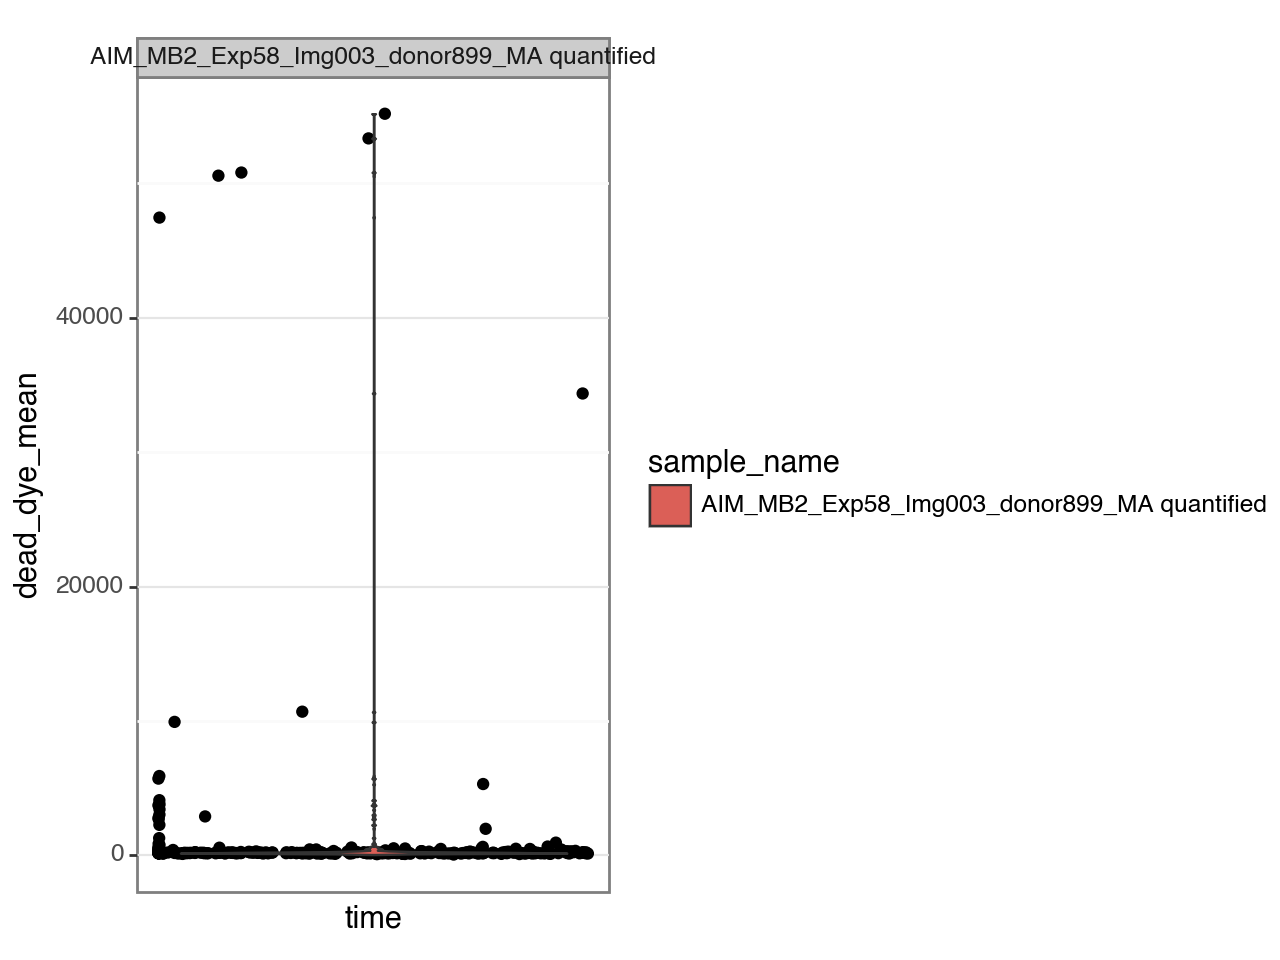

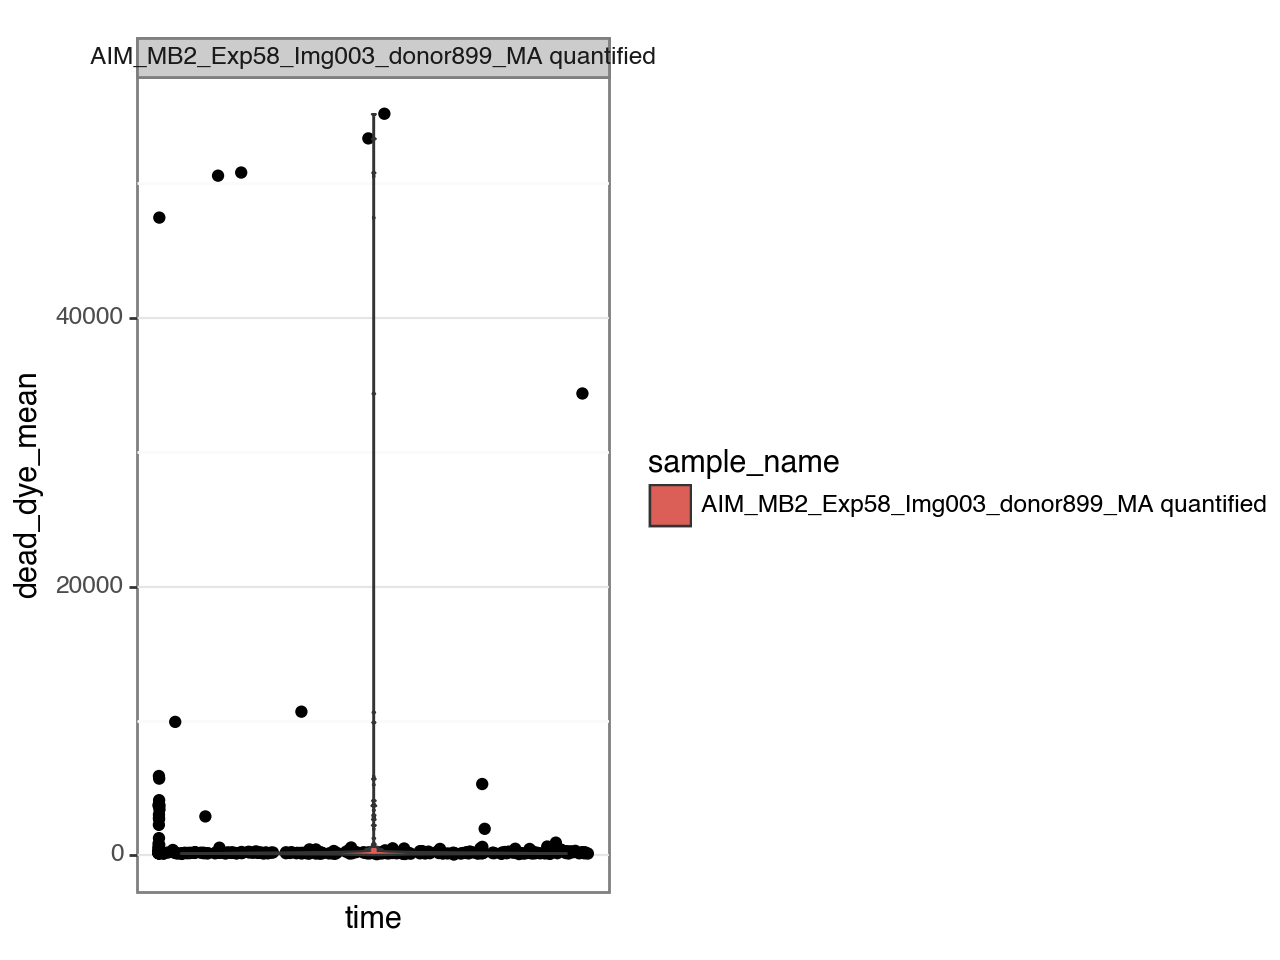


- Writing filtered tracks to /Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/output/BEHAV3D_combined_track_features_filtered.csv
### DONE - elapsed time: 0:00:01

--------------- Summarizing track features ---------------
- Writing summarized tracks to /Users/samdeblank/Documents/1.projects/BHVD_BEHAV3D/BEHAV3D-ilastik/test/imaris_run/ilastik_behav3d/output/BEHAV3D_combined_track_features_summarized.csv
### DONE - elapsed time: 0:00:00



/Users/samdeblank/Library/CloudStorage/OneDrive-PrinsesMaximaCentrum/github/BEHAV3D-ilastik/behav3d/analysis/feature_extraction.py:533: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/samdeblank/Library/CloudStorage/OneDrive-PrinsesMaximaCentrum/github/BEHAV3D-ilastik/behav3d/analysis/feature_extraction.py:534: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/samdeblank/Library/CloudStorage/OneDrive-PrinsesMaximaCentrum/github/BEHAV3D-ilastik/behav3d/analysis/feature_extraction.py:535: SettingWithCopyW

In [4]:
df_tracks = calculate_track_features(config, metadata)
df_tracks_filt = filter_tracks(df_tracks, config, metadata)
df_tracks_summ = summarize_track_features(df_tracks_filt, config)